In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Membuat DataFrame dari data
df = "Price_Agriculture_commodities_Week.csv"

# Membuat DataFrame
df = pd.read_csv(df)
print(df.isnull().sum())


State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64


In [2]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")


Jumlah baris duplikat: 0


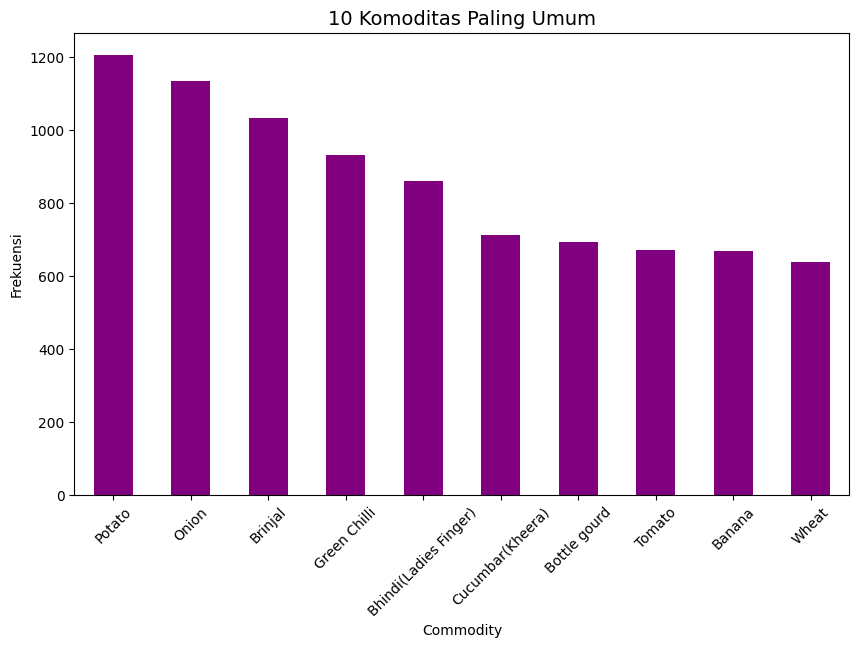

In [3]:
commodity_counts = df['Commodity'].value_counts().head(10)
plt.figure(figsize=(10, 6))
commodity_counts.plot(kind='bar', color='purple')
plt.title('10 Komoditas Paling Umum', fontsize=14)
plt.xlabel('Commodity')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

In [4]:
import pandas as pd
import plotly.express as px


fig1 = px.scatter(
    df,
    x="Min Price",
    y="Max Price",
    color="Commodity",
    title="Min Price vs Max Price",
    hover_data=["Market", "State"]
)
fig1.show()

In [5]:

import pandas as pd
import plotly.express as px


# Menghitung selisih antara Min Price dan Max Price
df['Price Difference'] = df['Max Price'] - df['Min Price']


# Menghitung rata-rata selisih per komoditas
avg_diff_per_commodity = df.groupby('Commodity')['Price Difference'].mean().reset_index()


# Mengurutkan berdasarkan rata-rata selisih yang tertinggi
avg_diff_per_commodity_sorted = avg_diff_per_commodity.sort_values(by='Price Difference', ascending=False)


# Menampilkan komoditas dengan rata-rata selisih tertinggi (top 10)
top_commodities = avg_diff_per_commodity_sorted.head(10)
print(top_commodities)
# Membuat plot
fig = px.bar(top_commodities,
             x='Commodity',
             y='Price Difference',
             title='Top 10 Komoditas dengan Rata-rata Selisih Min-Max Tertinggi',
             labels={'Commodity': 'Komoditas', 'Price Difference': 'Rata-rata Selisih Min-Max'},
             color='Price Difference')


fig.show()




        Commodity  Price Difference
195   She Buffalo      30000.000000
72     Dry Grapes      17500.000000
117        Kakada      15000.000000
33           Calf      15000.000000
63            Cow      15000.000000
113       Jasmine      15000.000000
70   Dry Chillies      13305.857143
21   Betal Leaves      13060.000000
83           Ghee      12625.000000
35      Cardamoms      11666.666667


In [6]:
import pandas as pd
import plotly.express as px


# Filter data untuk komoditas Potato
potato_data = df[df['Commodity'] == 'Potato']


# Mengelompokkan berdasarkan State dan menghitung jumlah entri
state_potato_counts = potato_data['State'].value_counts().reset_index()
state_potato_counts.columns = ['State', 'Potato_Count']


# Membuat plot bar
fig = px.bar(state_potato_counts,
             x='State',
             y='Potato_Count',
             title='Negara Bagian dengan Komoditas Potato Terbanyak',
             labels={'State': 'Negara Bagian', 'Potato_Count': 'Jumlah Komoditas Potato'},
             color='Potato_Count',
             color_continuous_scale='Blues',
             height=600)


# Menyesuaikan tampilan plot
fig.update_layout(xaxis={'categoryorder': 'total descending'},  # Urutkan berdasarkan jumlah
                  xaxis_tickangle=45)  # Memiringkan label negara bagian
fig.show()

In [8]:
# Konversi kolom Arrival_Date ke format datetime
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')

# Menghapus baris dengan tanggal yang tidak valid (NaT)
df = df.dropna(subset=['Arrival_Date'])

# Mengurutkan data berdasarkan Arrival_Date
df = df.sort_values(by='Arrival_Date')

# Filter data untuk komoditas Potato
potato_data = df[df['Commodity'] == 'Potato']

# Mengelompokkan berdasarkan Arrival_Date dan menghitung rata-rata Modal Price
avg_modal_price_potato = potato_data.groupby('Arrival_Date')['Modal Price'].mean().reset_index()

# Membuat plot garis rata-rata Modal Price Potato setiap hari
fig = px.line(avg_modal_price_potato,
              x='Arrival_Date',
              y='Modal Price',
              title='Rata-rata Modal Price Potato Setiap Harinya',
              labels={'Arrival_Date': 'Tanggal Kedatangan', 'Modal Price': 'Harga Modal (Rata-rata)'},
              markers=True,
              line_shape='spline')

# Menampilkan plot
fig.show()


<ipython-input-8-6283922819d7>:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

